OPWONYA TIMOTHY  
REG NO. S25M19/013
ACCESS NO. B34983  
Data lifecycle assignment

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.inspection import permutation_importance

QUESTION 1

In [5]:
# importation
data = pd.read_excel('Cassava_Yield_Data.xlsx')
print("Shape:", data.shape)
data.head()

Shape: (115, 20)


,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830


In [6]:
# ----------  Basic checks (Task 1: distribution, missing data, outliers) ----------
# Data types and basic info
print(data.info())
display(data.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sesn                   115 non-null    int64  
 1   locn                   115 non-null    int64  
 2   block                  115 non-null    int64  
 3   rep                    115 non-null    int64  
 4   tillage                115 non-null    object 
 5   ferT                   115 non-null    object 
 6   Plants_harvested       115 non-null    int64  
 7   No_bigtubers           115 non-null    int64  
 8   Weigh_bigtubers        115 non-null    float64
 9   No_mediumtubers        115 non-null    int64  
 10  Weight_mediumtubers    115 non-null    float64
 11  No_smalltubers         115 non-null    int64  
 12  Weight_smalltubers     115 non-null    float64
 13  Totaltuberno           115 non-null    int64  
 14  AV_tubers_Plant        115 non-null    float64
 15  Total_

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sesn,115.0,NaN,NaN,NaN,1.521739,0.501713,1.0,1.0,2.0,2.0,2.0
locn,115.0,NaN,NaN,NaN,1.521739,0.501713,1.0,1.0,2.0,2.0,2.0
block,115.0,NaN,NaN,NaN,2.043478,0.809931,1.0,1.0,2.0,3.0,3.0
rep,115.0,NaN,NaN,NaN,2.043478,0.809931,1.0,1.0,2.0,3.0,3.0
tillage,115,2,conv,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ferT,115,5,F2150,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plants_harvested,115.0,NaN,NaN,NaN,18.565217,6.442908,5.0,14.0,18.0,28.0,28.0
No_bigtubers,115.0,NaN,NaN,NaN,4.0,7.367544,0.0,0.0,0.0,5.5,41.0
Weigh_bigtubers,115.0,NaN,NaN,NaN,0.614783,1.174678,0.0,0.0,0.0,0.7,7.0
No_mediumtubers,115.0,NaN,NaN,NaN,49.521739,29.920757,0.0,26.5,44.0,65.5,126.0


In [9]:
# Convert relevant columns to categorical where appropriate
cat_cols = ['Sesn','locn','block','rep','tillage','ferT']
for i in cat_cols:
    if i in data.columns:
        data[i] = data[i].astype('category')

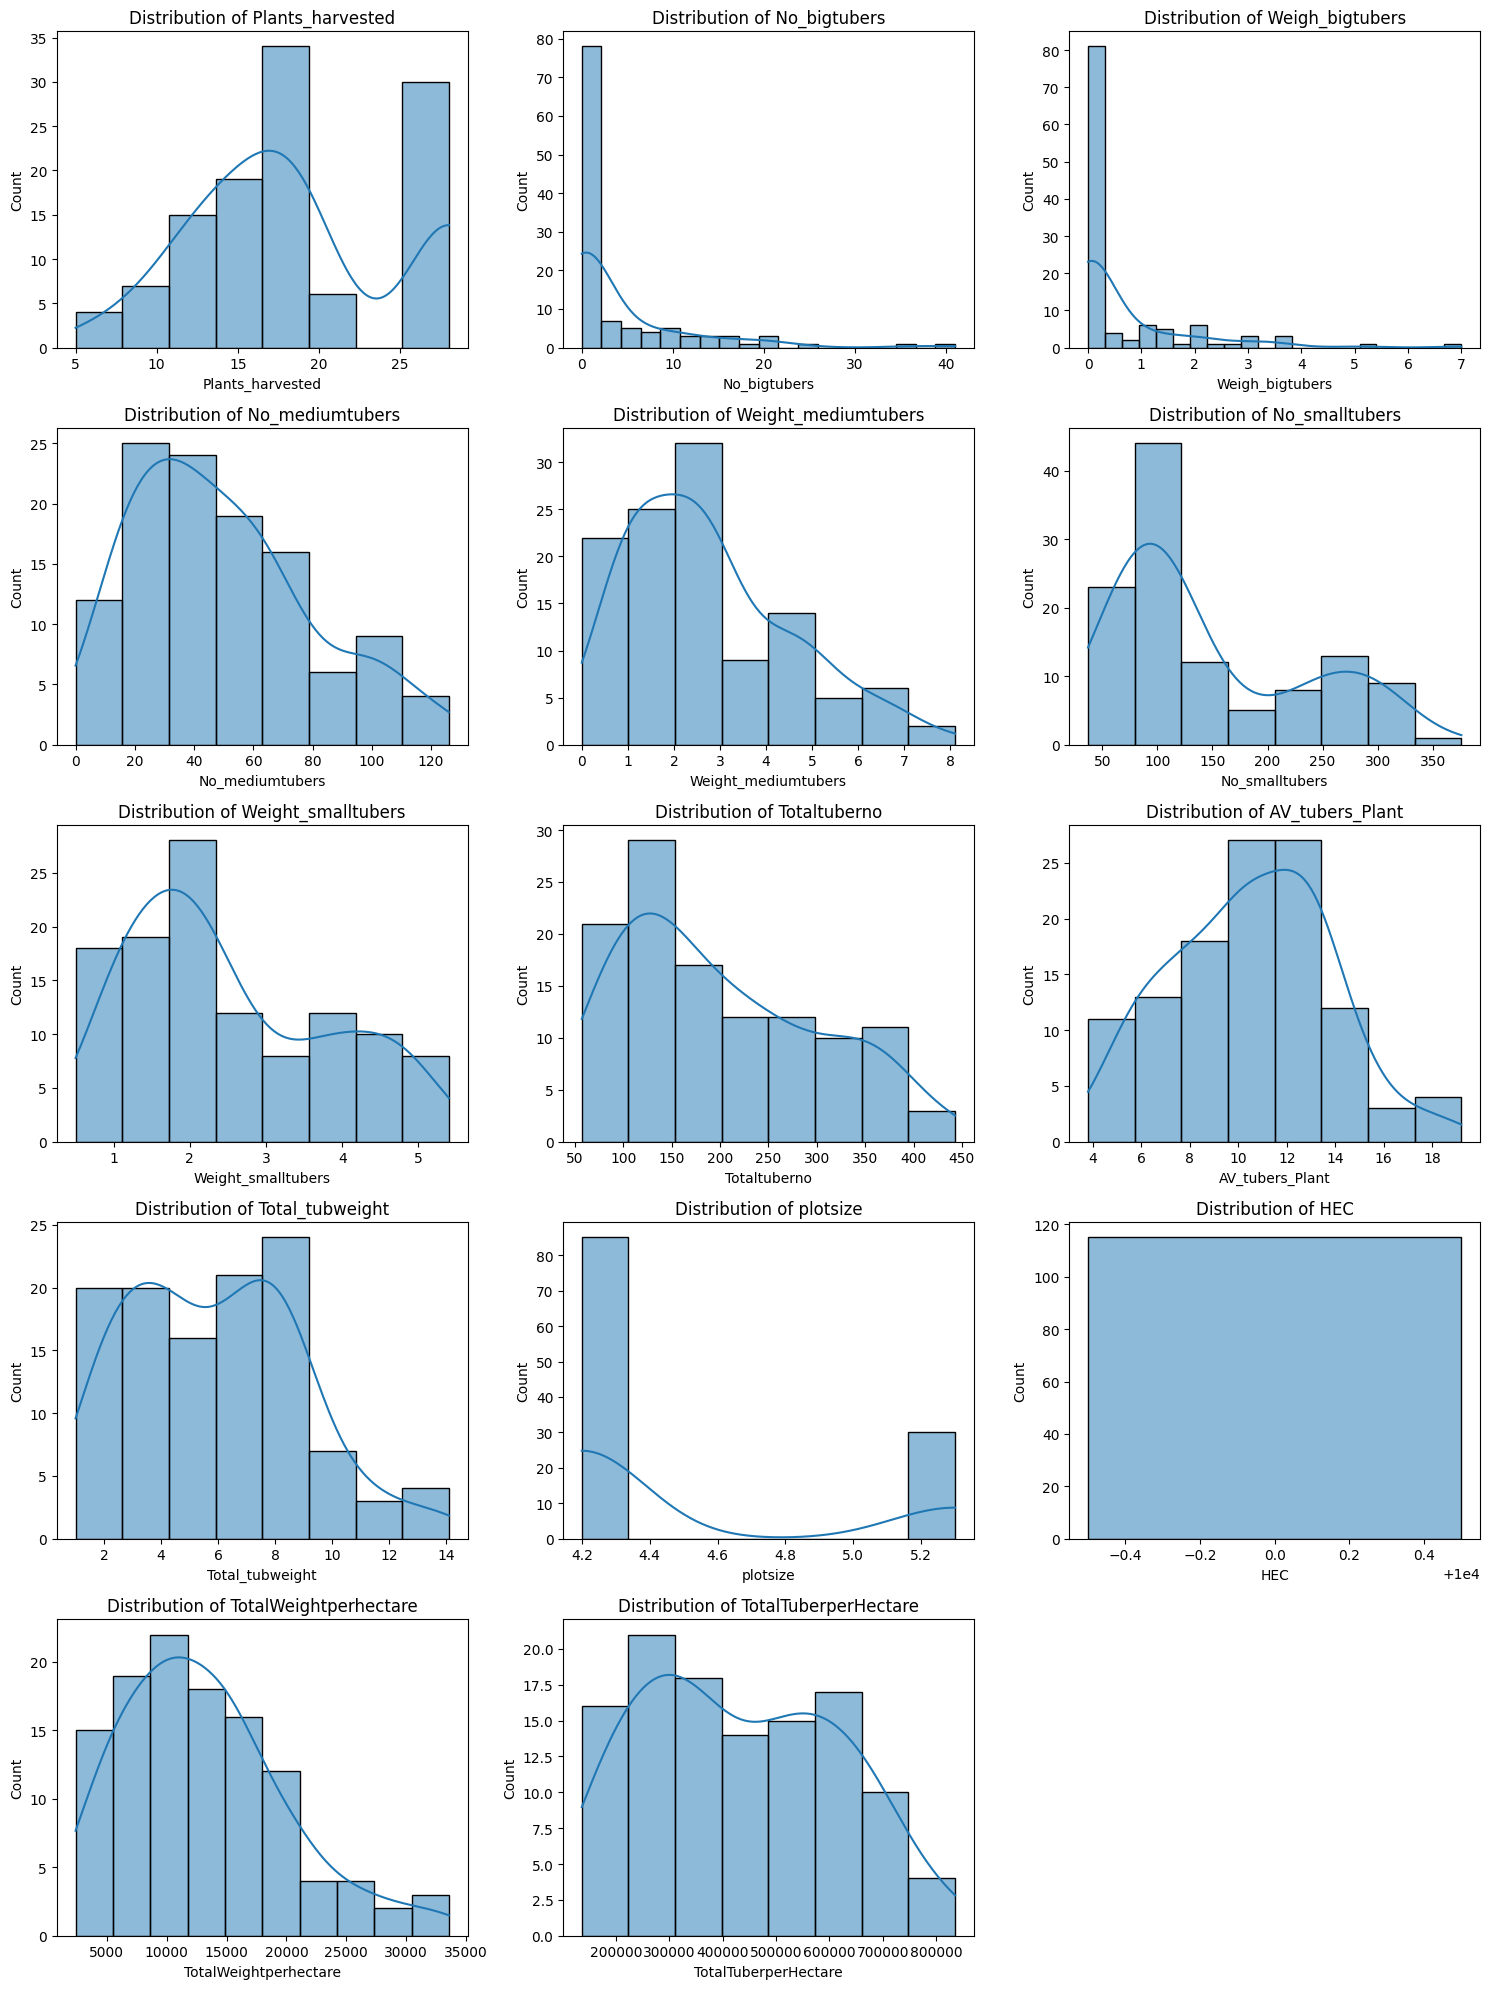

In [15]:
#Distribution plots for all variables
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
# Histograms + KDE
n = len(num_cols)
rows = int(np.ceil(n/3))
plt.figure(figsize=(15, 4*rows))
for i, col in enumerate(num_cols,1):
    plt.subplot(rows, 3, i)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

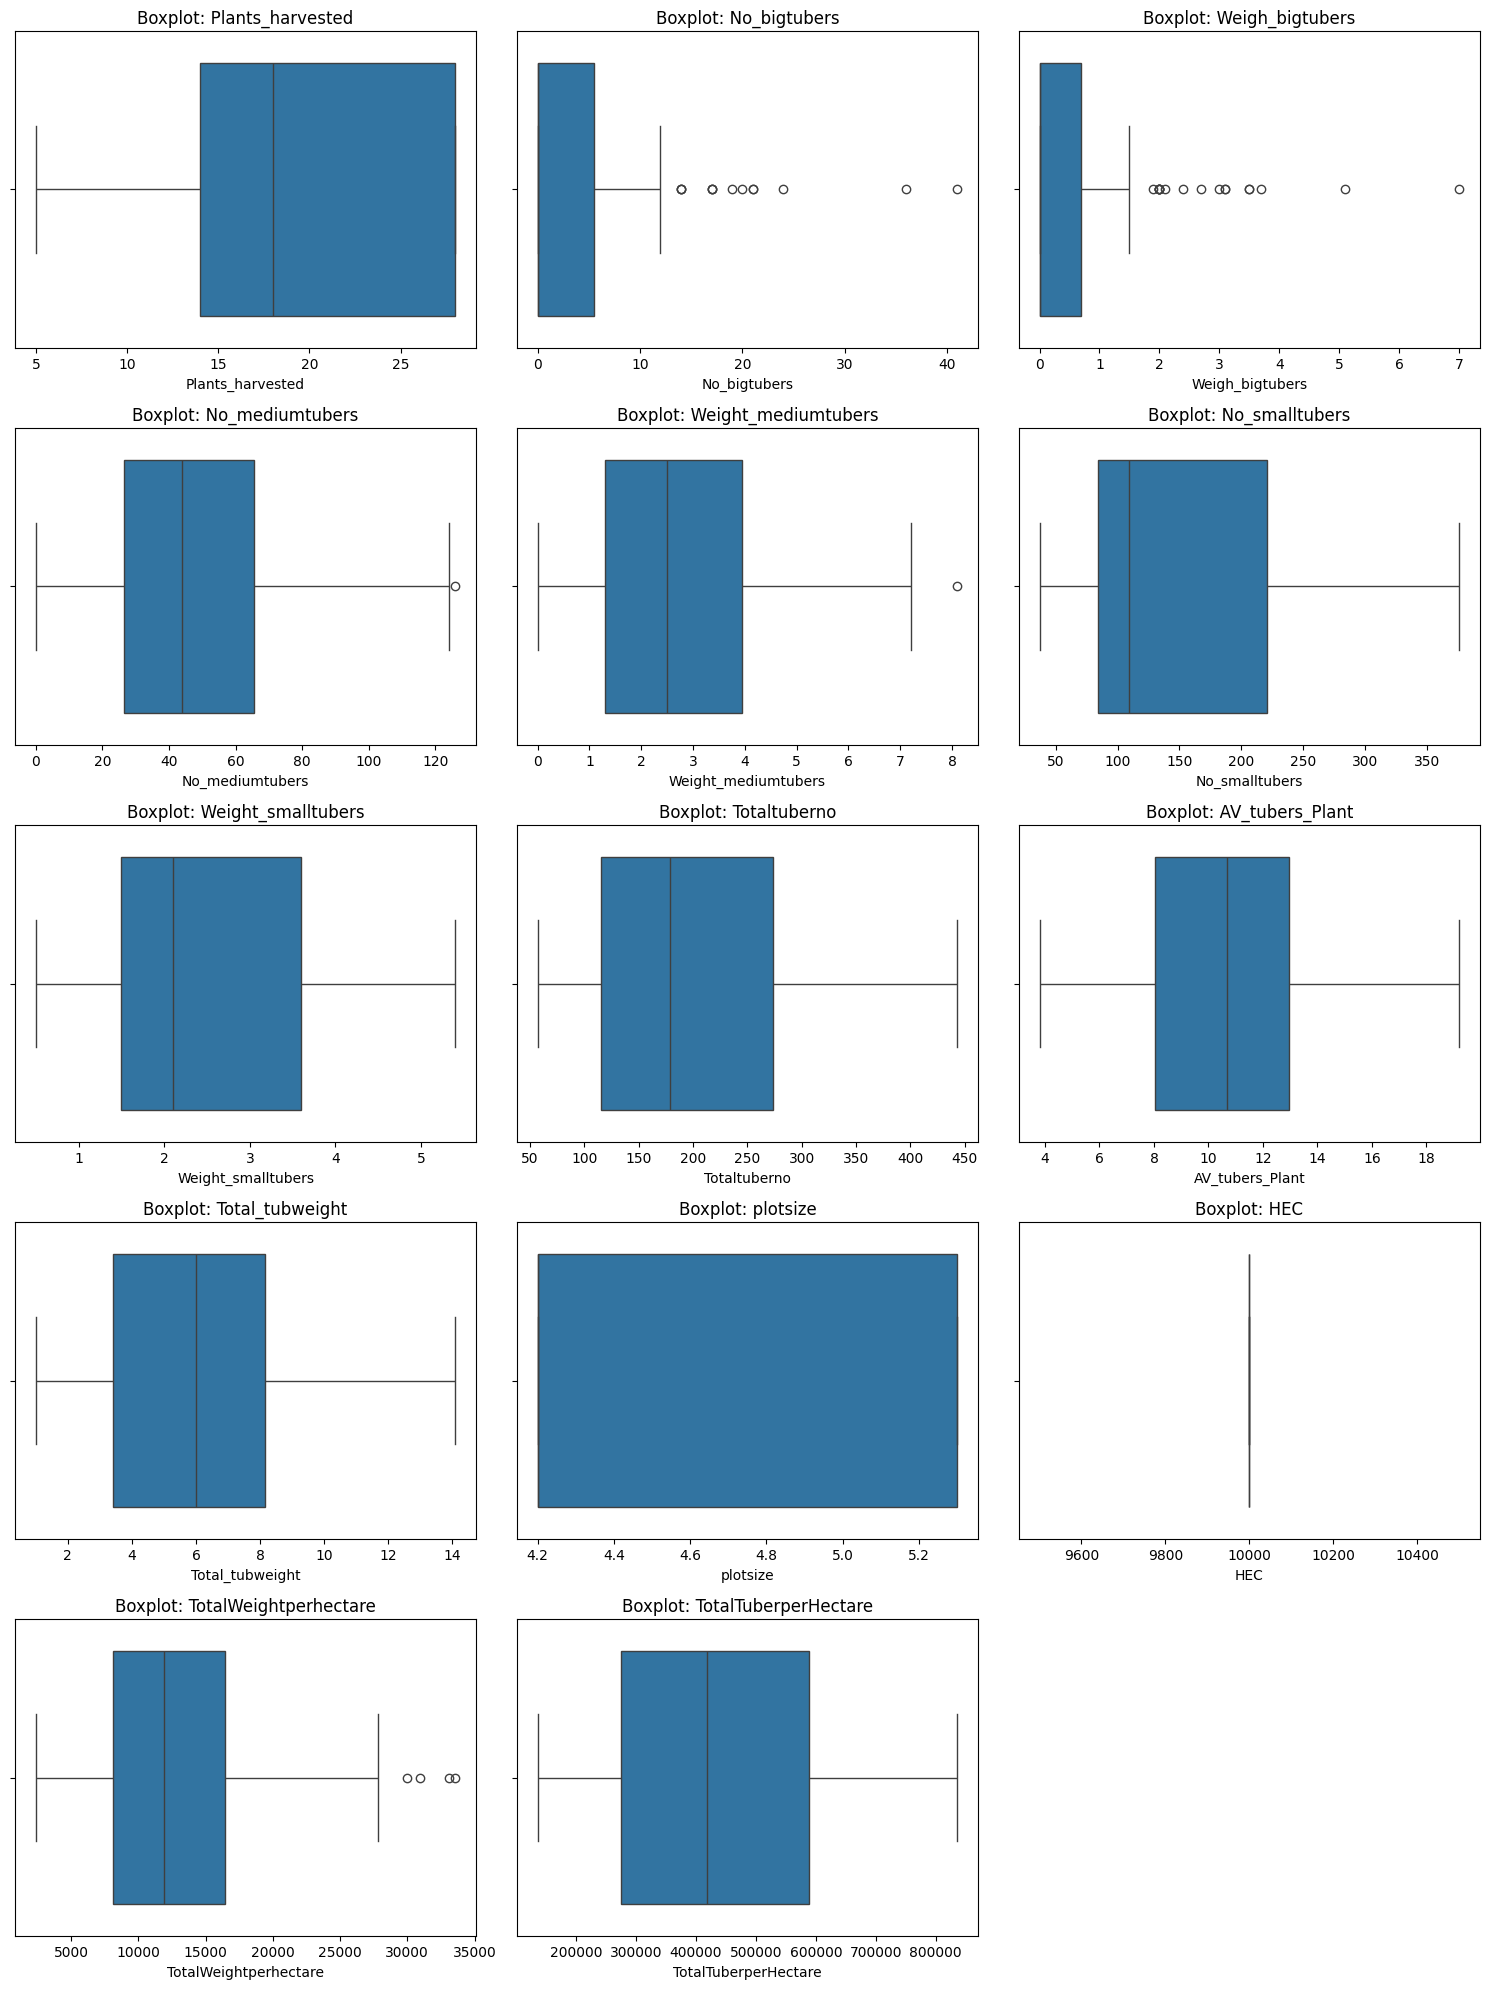

In [16]:
# Boxplots for outlier detection
plt.figure(figsize=(15, 4*rows))
for i, col in enumerate(num_cols,1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=data[col].dropna())
    plt.title("Boxplot: " + col)
plt.tight_layout()
plt.show()


In [17]:
# IQR-based outlier detection function
def get_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return series[(series < lower) | (series > upper)]

outlier_counts = {}
for col in num_cols:
    outlier_counts[col] = get_iqr_outliers(data[col].dropna()).shape[0]
pd.Series(outlier_counts).sort_values(ascending=False)

Weigh_bigtubers          17
No_bigtubers             13
TotalWeightperhectare     4
Weight_mediumtubers       1
No_mediumtubers           1
Plants_harvested          0
No_smalltubers            0
Weight_smalltubers        0
AV_tubers_Plant           0
Totaltuberno              0
Total_tubweight           0
plotsize                  0
HEC                       0
TotalTuberperHectare      0
dtype: int64

In [23]:
#Note on zeros as potential missing-like values:
zero_counts = (data[num_cols] == 0).sum().sort_values(ascending=False)
zc = zero_counts[zero_counts > 0]
df_zero = pd.DataFrame({
    'zero_count': zc,
    'percentage': round((zc / len(data)) * 100, 2)
})
display(df_zero)

,zero_count,percentage
No_bigtubers,65,56.52
Weigh_bigtubers,65,56.52
Weight_mediumtubers,1,0.87
No_mediumtubers,1,0.87


there was about 56.52% of no cassava harvested 

In [19]:
data_clean = data.copy()

In [ ]:
# Add log1p transforms for weight/yield columns likely skewed
skew_candidates = ['Weigh_bigtubers', 'No_bigtubers', 'TotalWeightperhectare', 'Weight_mediumtubers', 'No_mediumtubers']
for col in skew_candidates:
    if col in data_clean.columns:
        data_clean[col + '_log1p'] = np.log1p(data_clean[col])

#for col in num_cols:
 #   lower = data_clean[col].quantile(0.01)
  #  upper = data_clean[col].quantile(0.99)
   # data_clean[col] = data_clean[col].clip(lower, upper)


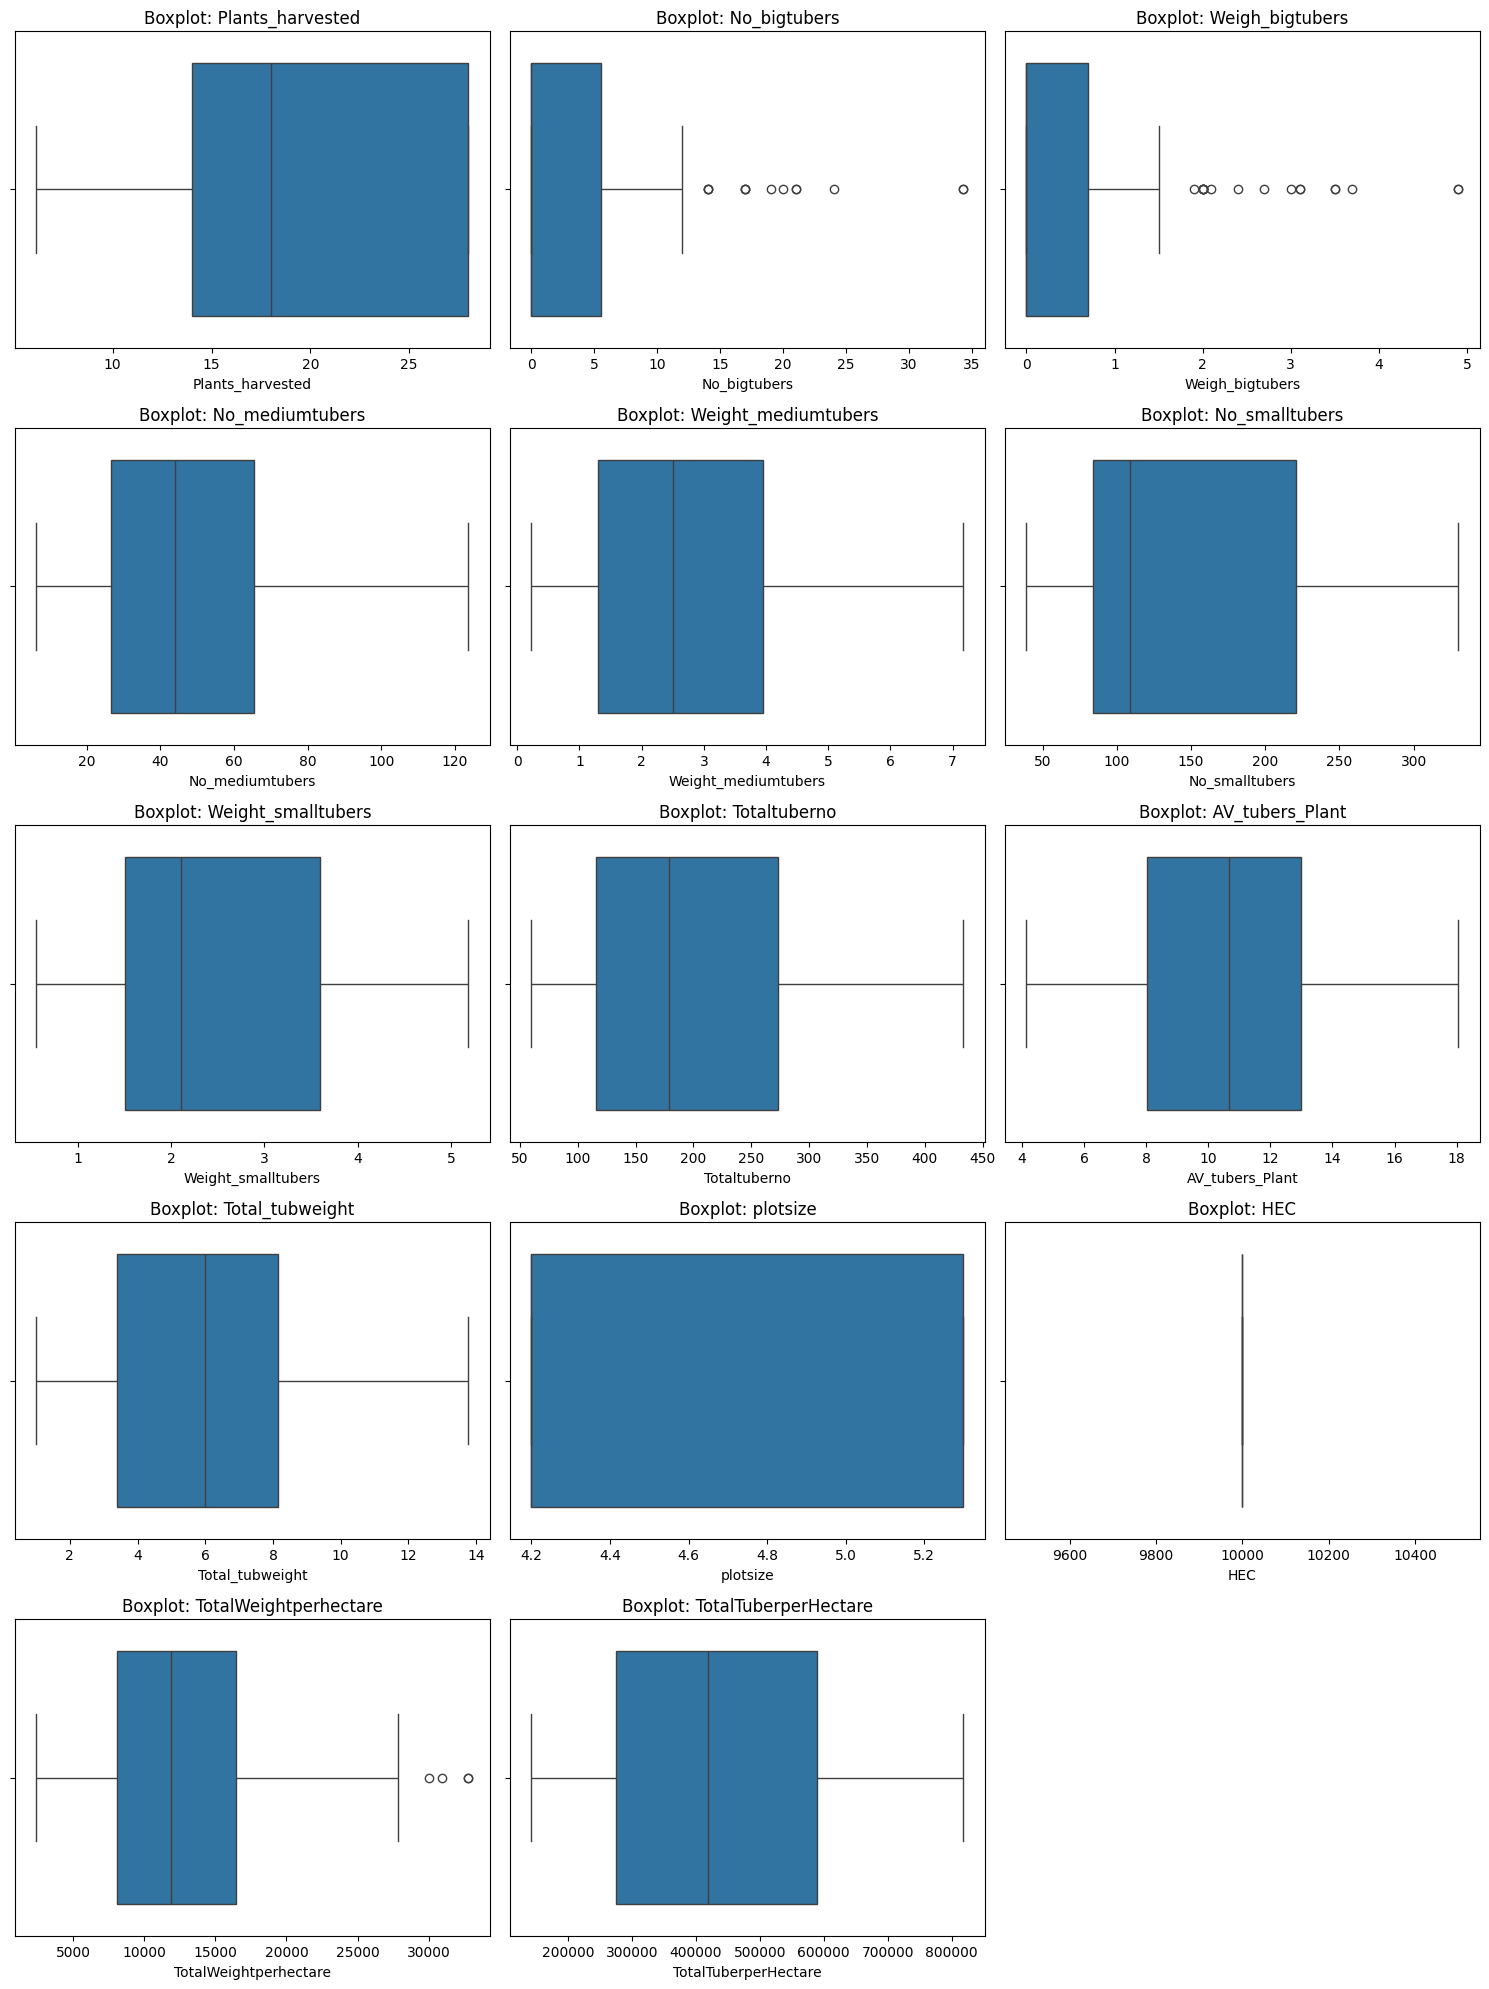

In [31]:
# Final cleaned data overview
plt.figure(figsize=(15, 4*rows))
for i, col in enumerate(num_cols,1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=data_clean[col].dropna())
    plt.title("Boxplot: " + col)
plt.tight_layout()
plt.show()

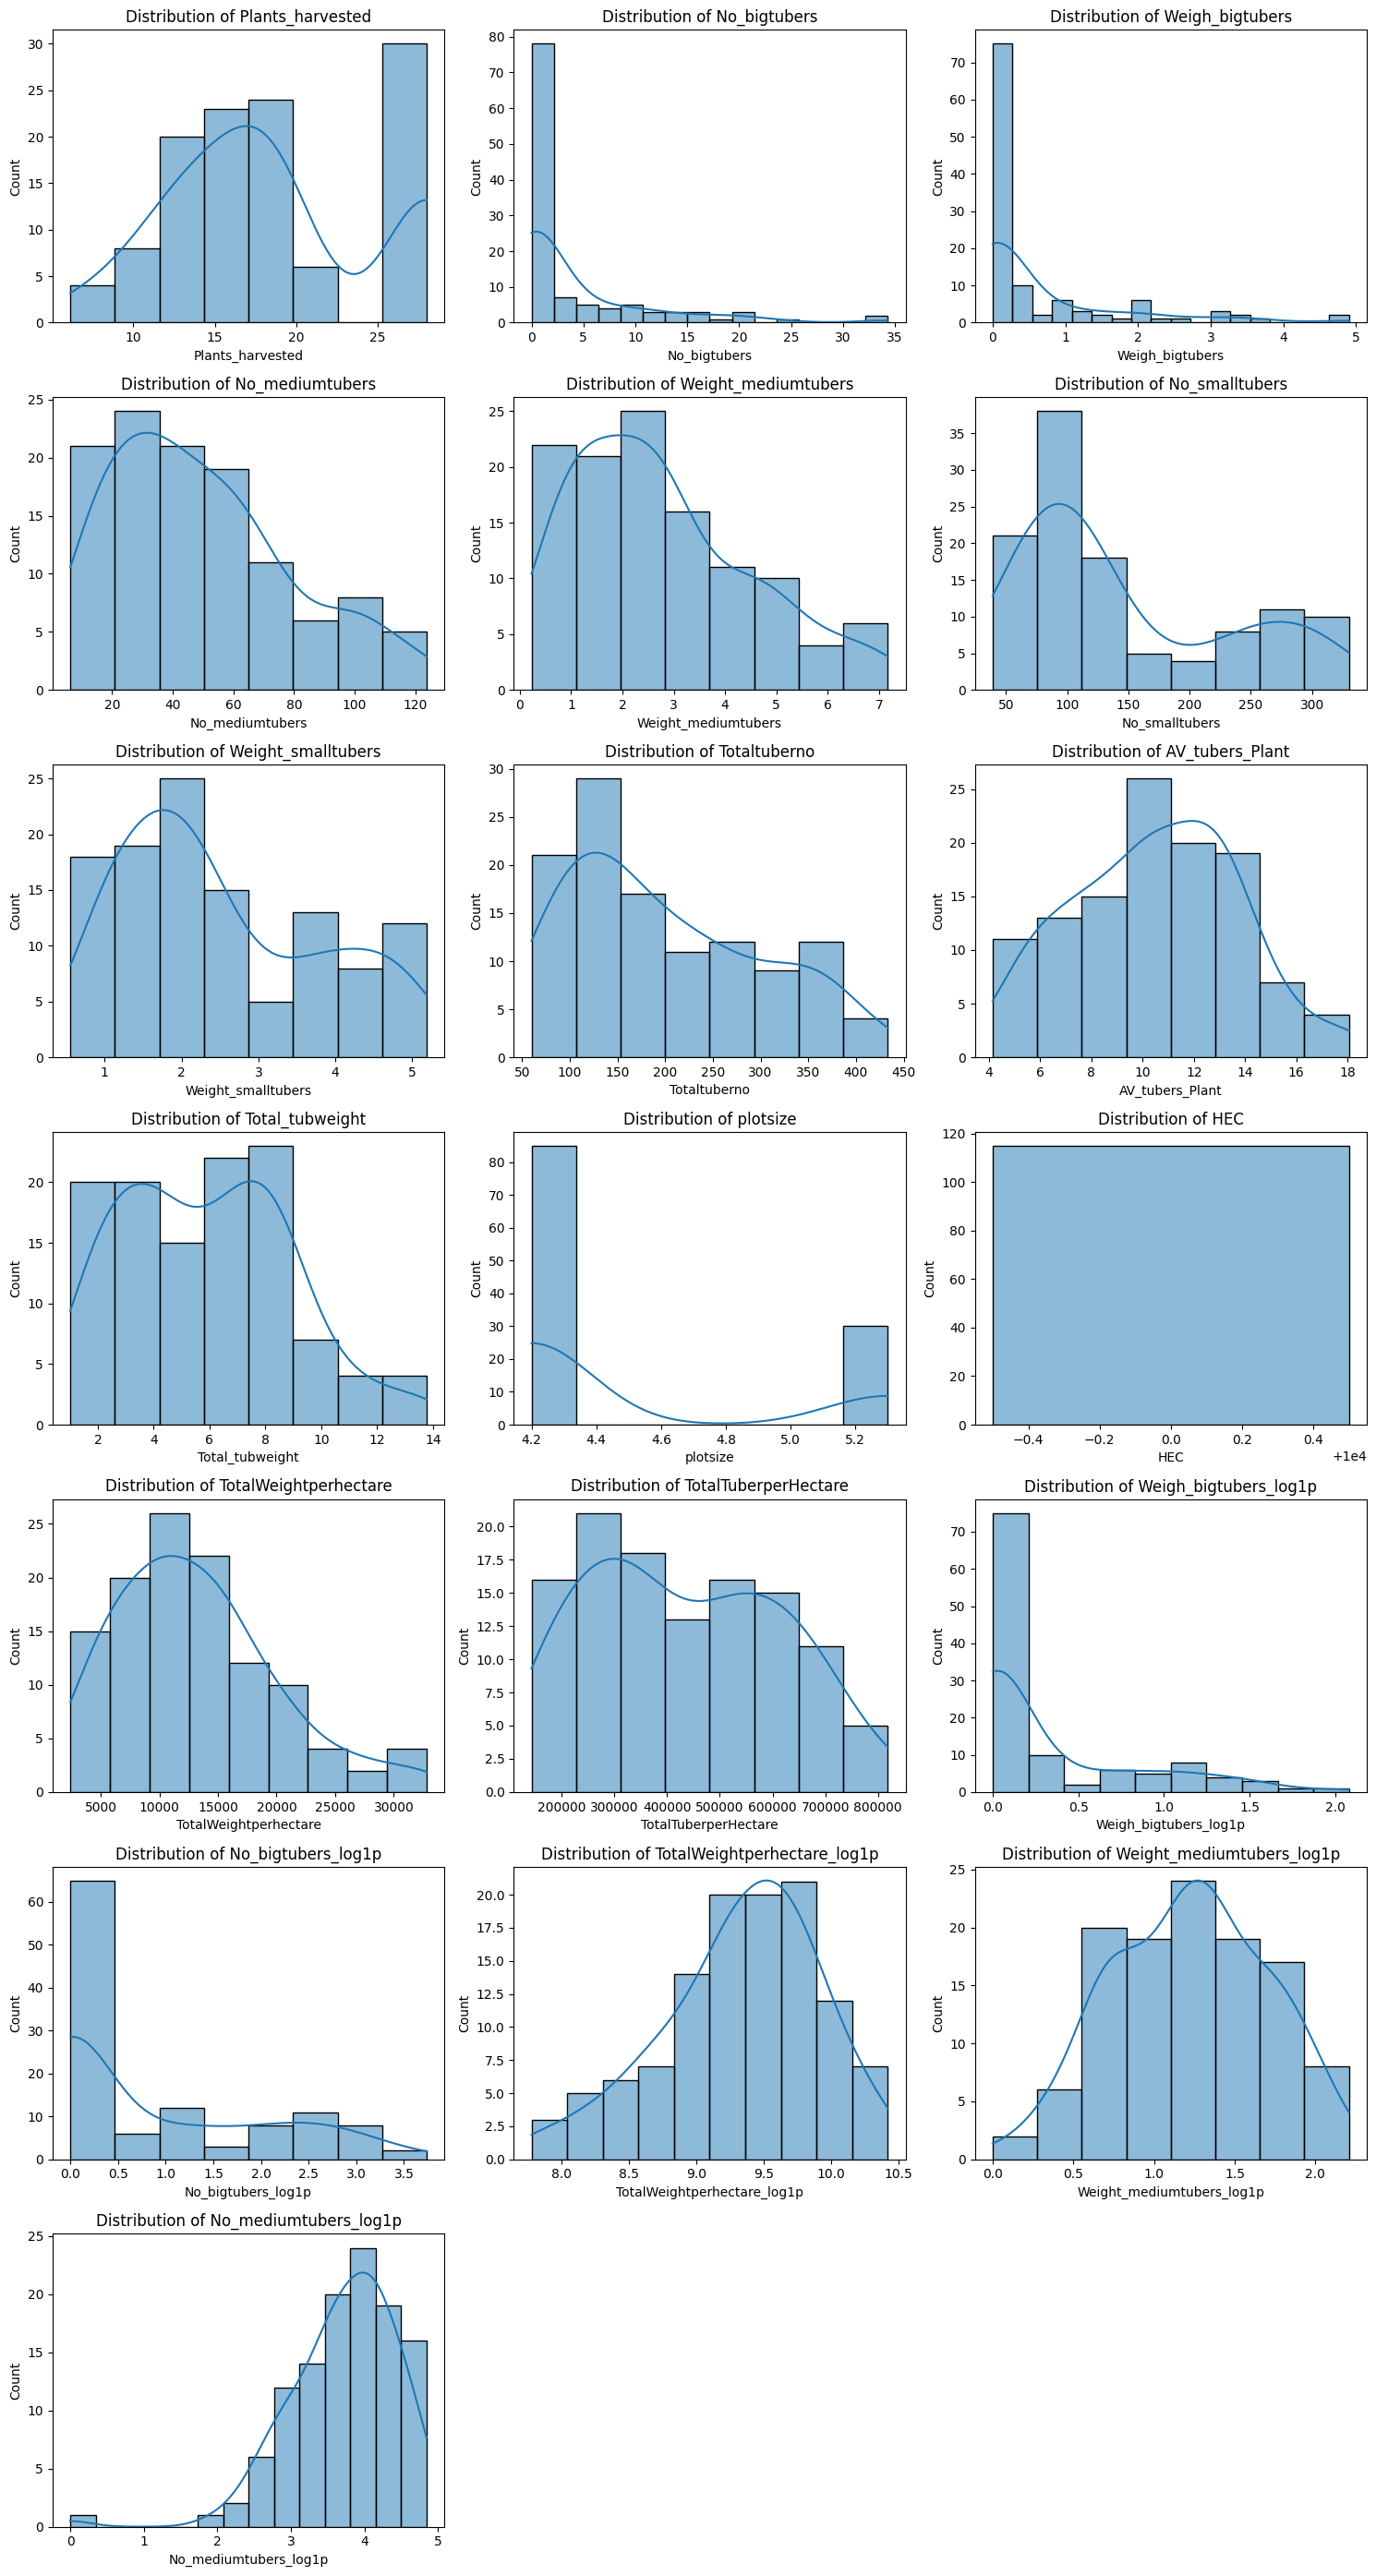

In [32]:
#Distribution plots for all variables
num_cols = data_clean.select_dtypes(include=[np.number]).columns.tolist()
# Histograms + KDE
n = len(num_cols)
rows = int(np.ceil(n/3))
plt.figure(figsize=(15, 4*rows))
for i, col in enumerate(num_cols,1):
    plt.subplot(rows, 3, i)
    sns.histplot(data_clean[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

The dataset shows substantial natural field variability, with several skewed variables and outliers.
there were no missing data but with about 56.52% of no cassava harvested 

QUESTION 2

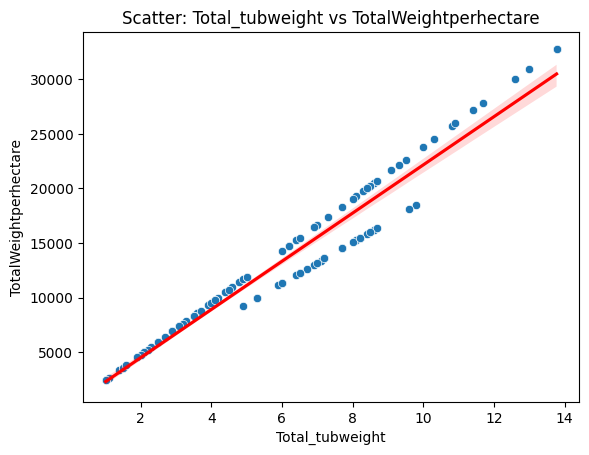

Spearman r: 0.9787238667521231 p: 1.4299307882821394e-79


In [80]:
x = 'Total_tubweight'
y = 'TotalWeightperhectare'
if x in data_clean.columns and y in data_clean.columns:
    plt.figure()
    sns.scatterplot(data=data_clean, x=x, y=y)
    sns.regplot(data=data_clean, x=x, y=y, scatter=False, color='red')
    plt.title(f"Scatter: {x} vs {y}")
    plt.show()
    # Spearman
    spearman_r, spearman_p = stats.spearmanr(data_clean[x], data_clean[y])
    print("Spearman r:", spearman_r, "p:", spearman_p)
else:
    print("Columns for 2a not found.")

there is a very strong, statistically significant positive association between the total weight of tubers and the total weight per hectare, as evidenced by the high spearman correlation and the clear visual trend in scatter plot. as one measure of weight increases, the other reliable increases as well.

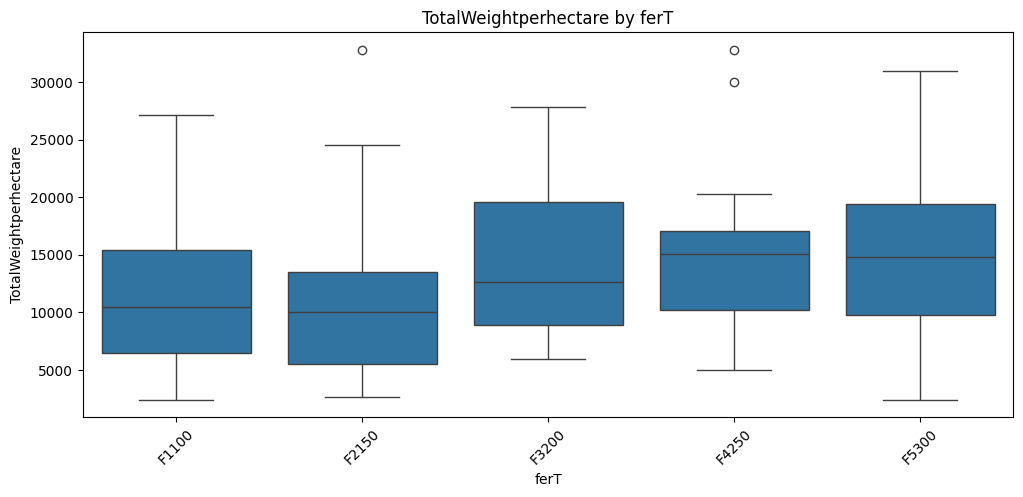

Levene test p-value (equal variances?): 0.9011254267905764
ANOVA: F= 2.1021302273086153 p= 0.08535646986823413


In [39]:
cont = 'TotalWeightperhectare'
cat = 'ferT'
if cont in data_clean.columns and cat in data_clean.columns:
    plt.figure(figsize=(12,5))
    sns.boxplot(data=data_clean, x=cat, y=cont)
    plt.xticks(rotation=45)
    plt.title(f"{cont} by {cat}")
    plt.show()
    # ANOVA (if assumptions met) otherwise Kruskal-Wallis
    groups = [group[cont].values for name, group in data_clean.groupby(cat, observed=True)]
    # Normality and equal variance checks (simple)
    # Shapiro for small groups is costly; we do Levene for homogeneity:
    stat, p_levene = stats.levene(*groups)
    print("Levene test p-value (equal variances?):", p_levene)
    # If p_levene > 0.05 we can perform one-way ANOVA
    try:
        fstat, p_anova = stats.f_oneway(*groups)
        print("ANOVA: F=", fstat, "p=", p_anova)
    except Exception as e:
        print("ANOVA failed:", e)
        # fallback Kruskal
        hstat, p_kw = stats.kruskal(*groups)
        print("Kruskal-Wallis H=", hstat, "p=", p_kw)
else:
    print("Columns for 2b not found.")


the p-value for the levene's test is higher than 0.05 therefore we fail to reject the null hypothesis which is a good Outcome for the validity of the ANONVA test
The ANONVA test: The P-value is greater than 0.05 so we fail to reject the null therefore there is no enough evidence to claim a significant differance 

QUESTION 3

In [40]:
# Filter for Soroti (locn == 1) adjust if locn uses strings or labels
soroti_df = data_clean[data_clean['locn'].isin([1, '1', 'Soroti'])] if 'locn' in data_clean.columns else data_clean.copy()
# If locn uses 1/2 numeric: cast accordingly
if 'locn' in data_clean.columns and data_clean['locn'].dtype.name.startswith('category'):
    # check categories
    print("locn categories:", data_clean['locn'].cat.categories)
# For safety: try numeric comparison
try:
    soroti_df = data_clean[data_clean['locn'].astype(str) == '1']  # where 1 = Soroti as per your dictionary
except:
    pass

print("Soroti subset shape:", soroti_df.shape)

locn categories: Index([1, 2], dtype='int64')
Soroti subset shape: (55, 25)


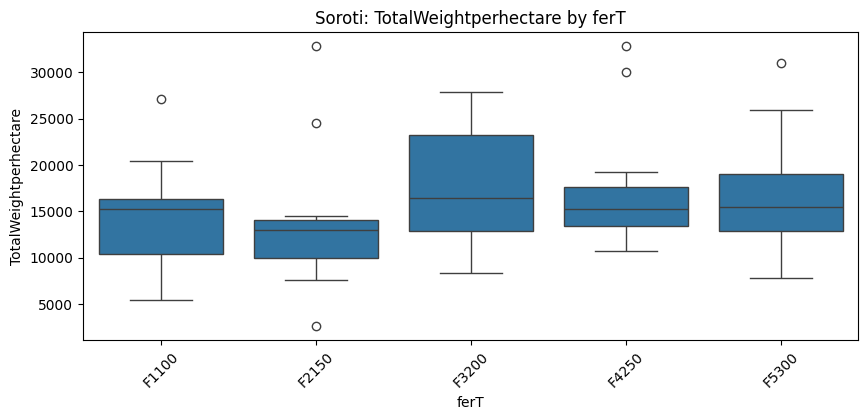

ANOVA for TotalWeightperhectare by fertilizer: F=0.694, p=0.5996


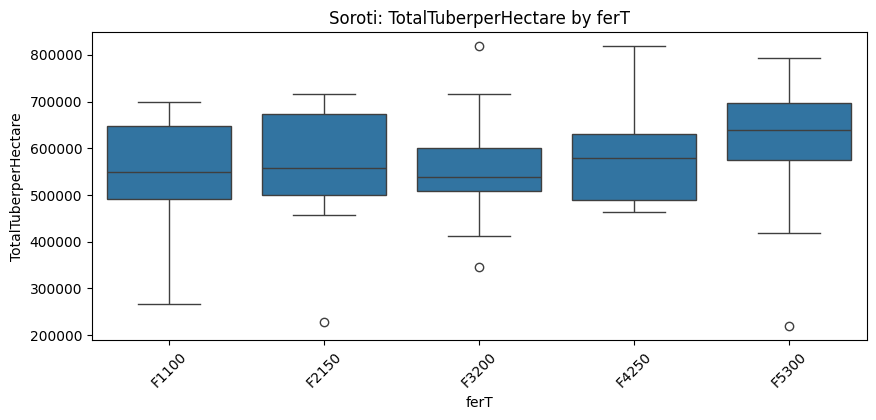

ANOVA for TotalTuberperHectare by fertilizer: F=0.342, p=0.8480


In [42]:
# 3a Does fertilizer affect TotalWeightperhectare & TotalTuberperHectare?
for outcome in ['TotalWeightperhectare','TotalTuberperHectare']:
    if outcome in soroti_df.columns:
        plt.figure(figsize=(10,4))
        sns.boxplot(data=soroti_df, x='ferT', y=outcome)
        plt.xticks(rotation=45)
        plt.title(f"Soroti: {outcome} by ferT")
        plt.show()
        groups = [g[outcome].values for n,g in soroti_df.groupby('ferT', observed= True)]
        try:
            fstat, pval = stats.f_oneway(*groups)
            print(f"ANOVA for {outcome} by fertilizer: F={fstat:.3f}, p={pval:.4f}")
        except Exception as e:
            hstat, pval = stats.kruskal(*groups)
            print(f"Kruskal-Wallis for {outcome} by fertilizer: H={hstat:.3f}, p={pval:.4f}")
    else:
        print(outcome, "not in dataset")

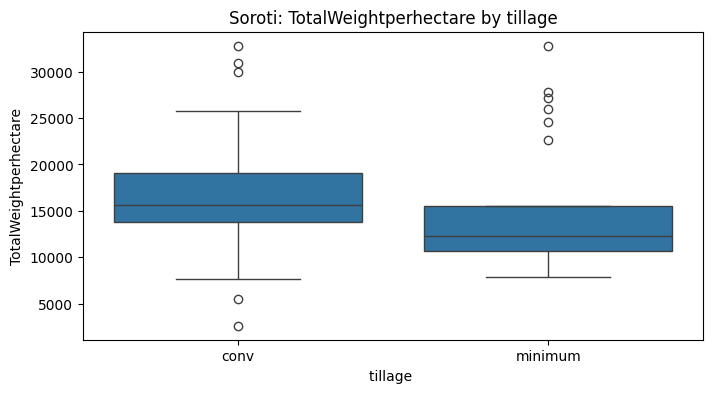

ANOVA for TotalWeightperhectare by tillage: F=0.465, p=0.4983


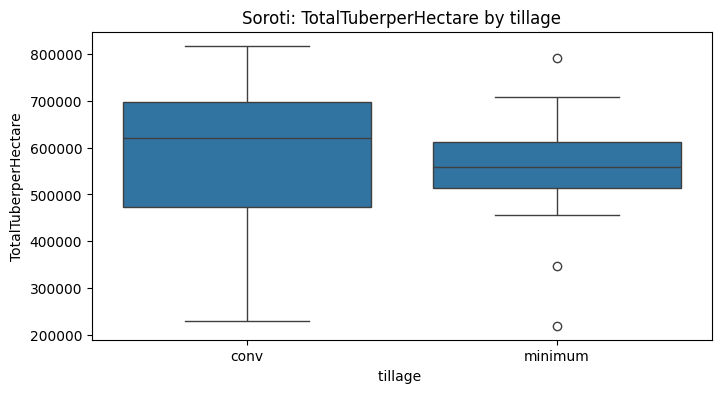

ANOVA for TotalTuberperHectare by tillage: F=0.592, p=0.4450


In [50]:
# 3b Does tillage method affect TotalWeightperhectare & TotalTuberperHectare?
for outcome in ['TotalWeightperhectare','TotalTuberperHectare']:
    if outcome in soroti_df.columns and 'tillage ' in soroti_df.columns:
        plt.figure(figsize=(8,4))
        sns.boxplot(data=soroti_df, x='tillage ', y=outcome)
        plt.title(f"Soroti: {outcome} by tillage")
        plt.show()
        groups = [g[outcome].values for n,g in soroti_df.groupby('tillage ', observed= True )]
        try:
            fstat, pval = stats.f_oneway(*groups)
            print(f"ANOVA for {outcome} by tillage: F={fstat:.3f}, p={pval:.4f}")
        except Exception as e:
            hstat, pval = stats.kruskal(*groups)
            print(f"Kruskal-Wallis for {outcome} by tillage: H={hstat:.3f}, p={pval:.4f}")
    else:
        print("Required columns for tillage analysis not found.")

Based on the statistical evidence, you cannot conclude that at least one group mean is different from the others. There is no enough evidence to claim there is a signficant difference in all the above test done

QUESTION 4

In [51]:
# create a "plot_id" if none exists by concatenating locn, block, rep, Sesn
if 'plot_id' not in data_clean.columns:
    data_clean['plot_id'] = data_clean.index.astype(str)
    if {'locn','block','rep'}.issubset(data_clean.columns):
        data_clean['plot_id'] = data_clean['locn'].astype(str) + "_" + data_clean['block'].astype(str) + "_" + data_clean['rep'].astype(str) + "_" + data_clean['Sesn'].astype(str)

In [52]:
# create indicator columns for fertilizer-season combinations
df_assoc = data_clean.copy()
df_assoc['ferT'] = df_assoc['ferT'].astype(str)
df_assoc['Sesn'] = df_assoc['Sesn'].astype(str)

df_assoc['ferT_Sesn'] = df_assoc['ferT'] + "_S" + df_assoc['Sesn']

basket = pd.crosstab(df_assoc['plot_id'], df_assoc['ferT_Sesn'])

In [53]:
basket.head()

ferT_Sesn,F1100_S1,F1100_S2,F2150_S1,F2150_S2,F3200_S1,F3200_S2,F4250_S1,F4250_S2,F5300_S1,F5300_S2
plot_id,,,,,,,,,,
1_1_1_1,1,0,1,0,1,0,1,0,1,0
1_1_1_2,0,2,0,2,0,2,0,2,0,2
1_2_2_1,2,0,2,0,2,0,2,0,2,0
1_2_2_2,0,2,0,2,0,2,0,2,0,2
1_3_3_1,2,0,2,0,2,0,2,0,2,0


In [54]:
# convert counts to 1/0
basket = (basket > 0).astype(int)

In [55]:
basket.head()

ferT_Sesn,F1100_S1,F1100_S2,F2150_S1,F2150_S2,F3200_S1,F3200_S2,F4250_S1,F4250_S2,F5300_S1,F5300_S2
plot_id,,,,,,,,,,
1_1_1_1,1,0,1,0,1,0,1,0,1,0
1_1_1_2,0,1,0,1,0,1,0,1,0,1
1_2_2_1,1,0,1,0,1,0,1,0,1,0
1_2_2_2,0,1,0,1,0,1,0,1,0,1
1_3_3_1,1,0,1,0,1,0,1,0,1,0


In [59]:
# run apriori (min_support can be adjusted)
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)
print("Frequent itemsets (top 20):")
display(frequent_itemsets.head(20))

Frequent itemsets (top 20):


c:\Users\HP\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.5,(F1100_S1)
1,0.5,(F1100_S2)
2,0.5,(F2150_S1)
3,0.5,(F2150_S2)
4,0.5,(F3200_S1)
5,0.5,(F3200_S2)
6,0.5,(F4250_S1)
7,0.5,(F4250_S2)
8,0.5,(F5300_S1)
9,0.5,(F5300_S2)


In [60]:
# generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(['lift','confidence'], ascending=[False, False])
print("Top association rules:")
display(rules.head(20))

Top association rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(F2150_S1),(F1100_S1),0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
1,(F1100_S1),(F2150_S1),0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
2,(F3200_S1),(F1100_S1),0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
3,(F1100_S1),(F3200_S1),0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
4,(F1100_S1),(F4250_S1),0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
5,(F4250_S1),(F1100_S1),0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
6,(F5300_S1),(F1100_S1),0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
7,(F1100_S1),(F5300_S1),0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
8,(F1100_S2),(F2150_S2),0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
9,(F2150_S2),(F1100_S2),0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0


The association rules generated from the fertilizer–season dataset demonstrate a highly deterministic structure, with all extracted rules exhibiting identical performance metrics across support, confidence, lift, leverage, conviction, and similarity indices. This uniformity reveals important insights regarding the internal structure of the dataset and the nature of the item co-occurrences. 
All rules display a support value of 0.5, implying that each antecedent–consequent pair appears together in exactly half of the recorded observations. This suggests that the dataset is either small or highly constrained, such that specific fertilizer–season treatments consistently appear in fixed pairings rather than independent combinations. 

Similarly, the confidence of 1.0 for every rule indicates perfect predictive accuracy: whenever the antecedent item appears, the consequent item always appears. This implies that there are no instances where one of the paired items shows up alone. Therefore, the relationships identified are not probabilistic but fully deterministic. 
Overall, the association rule mining results reveal that the dataset contains rigid, perfectly paired combinations of fertilizer–season treatments. While the rules appear “strong” by conventional measures, the strength arises purely from the dataset’s structure rather than meaningful agronomic or behavioural patterns.

QUESTION 5

In [62]:
target = 'Plants_harvested'
if target not in data_clean.columns:
    raise ValueError("Plants_harvested not found in dataset")

In [63]:
# Select candidate features
candidate_features = [
    'No_bigtubers','Weigh_bigtubers','No_mediumtubers','Weight_mediumtubers',
    'No_smalltubers','Weight_smalltubers','Totaltuberno','AV_tubers_Plant',
    'Total_tubweight','plotsize','HEC','TotalWeightperhectare','TotalTuberperHectare',
    'Sesn','locn','block','rep','tillage','ferT'
]

In [64]:
# keep only existing columns
features = [f for f in candidate_features if f in data_clean.columns]
print("Using features:", features)

X = data_clean[features].copy()
y = data_clean[target].copy()

Using features: ['No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers', 'Weight_mediumtubers', 'No_smalltubers', 'Weight_smalltubers', 'Totaltuberno', 'AV_tubers_Plant', 'Total_tubweight', 'plotsize', 'HEC', 'TotalWeightperhectare', 'TotalTuberperHectare', 'Sesn', 'locn', 'block', 'rep', 'ferT']


In [67]:
# Basic split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Preprocessing pipelines
numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
cat_feats = [c for c in X.columns if c not in numeric_feats]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feats),
        ('cat', categorical_transformer, cat_feats)
    ], remainder='drop')

In [71]:
# RandomForest pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))])

In [72]:
# Fit
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [74]:
# Predict + evaluate
y_pred = rf_pipeline.predict(X_test)

# Calculate MSE first, then take the square root for RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Manually calculate the square root of the MSE

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RandomForest performance on test set:")
print(f"RMSE: {rmse:.3f}, MAE: {mae:.3f}, R2: {r2:.3f}")


RandomForest performance on test set:
RMSE: 1.791, MAE: 1.215, R2: 0.929


The R² value of 0.929 indicates very strong model fit, suggesting that the predictors collectively account for nearly all the variability in the response variable. This level of explanatory power is characteristic of a well-specified regression model with minimal unexplained variance.

In [75]:
# Cross-validated RMSE (5-fold)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = -cross_val_score(rf_pipeline, X, y, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
print("5-fold CV RMSE mean (RandomForest):", cv_scores.mean(), "std:", cv_scores.std())

5-fold CV RMSE mean (RandomForest): 1.7773128734475563 std: 0.279222996684713


In [76]:
# Baseline linear regression for comparison
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred_lr), "RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R2: 0.96871941778429 RMSE: 1.1850628528736684


The R² value of 0.9687 indicates a very strong model fit, suggesting that the predictors collectively account for nearly all the variability in the response variable. This level of explanatory power is characteristic of a well-specified regression model with minimal unexplained variance.

In [77]:
# Feature importance (permutation importance on RF)
# Need numeric matrix of preprocessed features for permutation: use pipeline to transform
X_test_trans = rf_pipeline.named_steps['preprocessor'].transform(X_test)
r = permutation_importance(rf_pipeline.named_steps['model'], X_test_trans, y_test, n_repeats=10, random_state=42, n_jobs=-1)
# feature names extraction: numeric feats + onehot categories
ohe = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe_cols = []
if cat_feats:
    ohe_cols = ohe.get_feature_names_out(cat_feats).tolist()
feature_names = numeric_feats + ohe_cols
feat_imp = pd.Series(r.importances_mean, index=feature_names).sort_values(ascending=False)
print("Top 15 important features (permutation importances):")
display(feat_imp.head(15))


Top 15 important features (permutation importances):


plotsize                 1.150150
AV_tubers_Plant          0.121242
No_smalltubers           0.060672
Totaltuberno             0.017458
TotalTuberperHectare     0.009694
Weight_smalltubers       0.007200
ferT_F3200               0.004354
locn_1                   0.003257
locn_2                   0.001775
TotalWeightperhectare    0.000712
Total_tubweight          0.000674
rep_1                    0.000140
rep_3                    0.000122
block_2                  0.000082
ferT_F2150               0.000055
dtype: float64

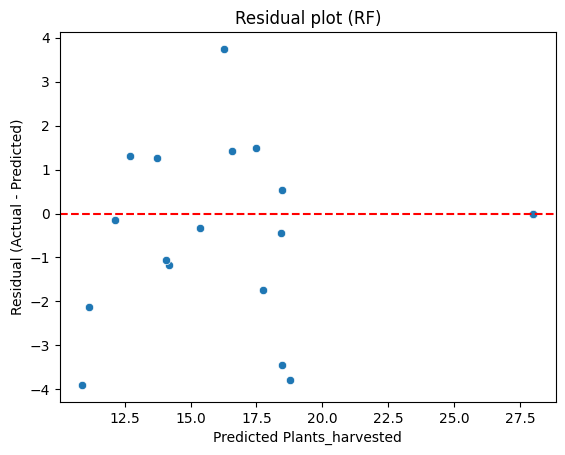

In [78]:
# Residual plot
plt.figure()
sns.scatterplot(x=y_pred, y=(y_test - y_pred))
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Plants_harvested")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual plot (RF)")
plt.show()

from the scatter plot above the random distribution of residuals suggests that the Random Forest model has successfully captured the underlying structure of the data. You can generally trust the results and predictions generated by this model, as the assumptions of a well-fitted model appear to be met.

In [79]:
# Save model
import joblib
joblib.dump(rf_pipeline, "rf_plants_harvested_model.joblib")
print("Saved RandomForest model to rf_plants_harvested_model.joblib")

Saved RandomForest model to rf_plants_harvested_model.joblib
